In [2]:
import sys

sys.path.append("..")

from tools.tools import load_sample, preprocess_data
from tools.display_tools import plot_current_state_of_graph, fancy_plot
import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

# Graphics that we have included in our paper
 (excluding experimental results. Check the experiment repo for this)

## Displaying graphs

<Figure size 640x480 with 0 Axes>

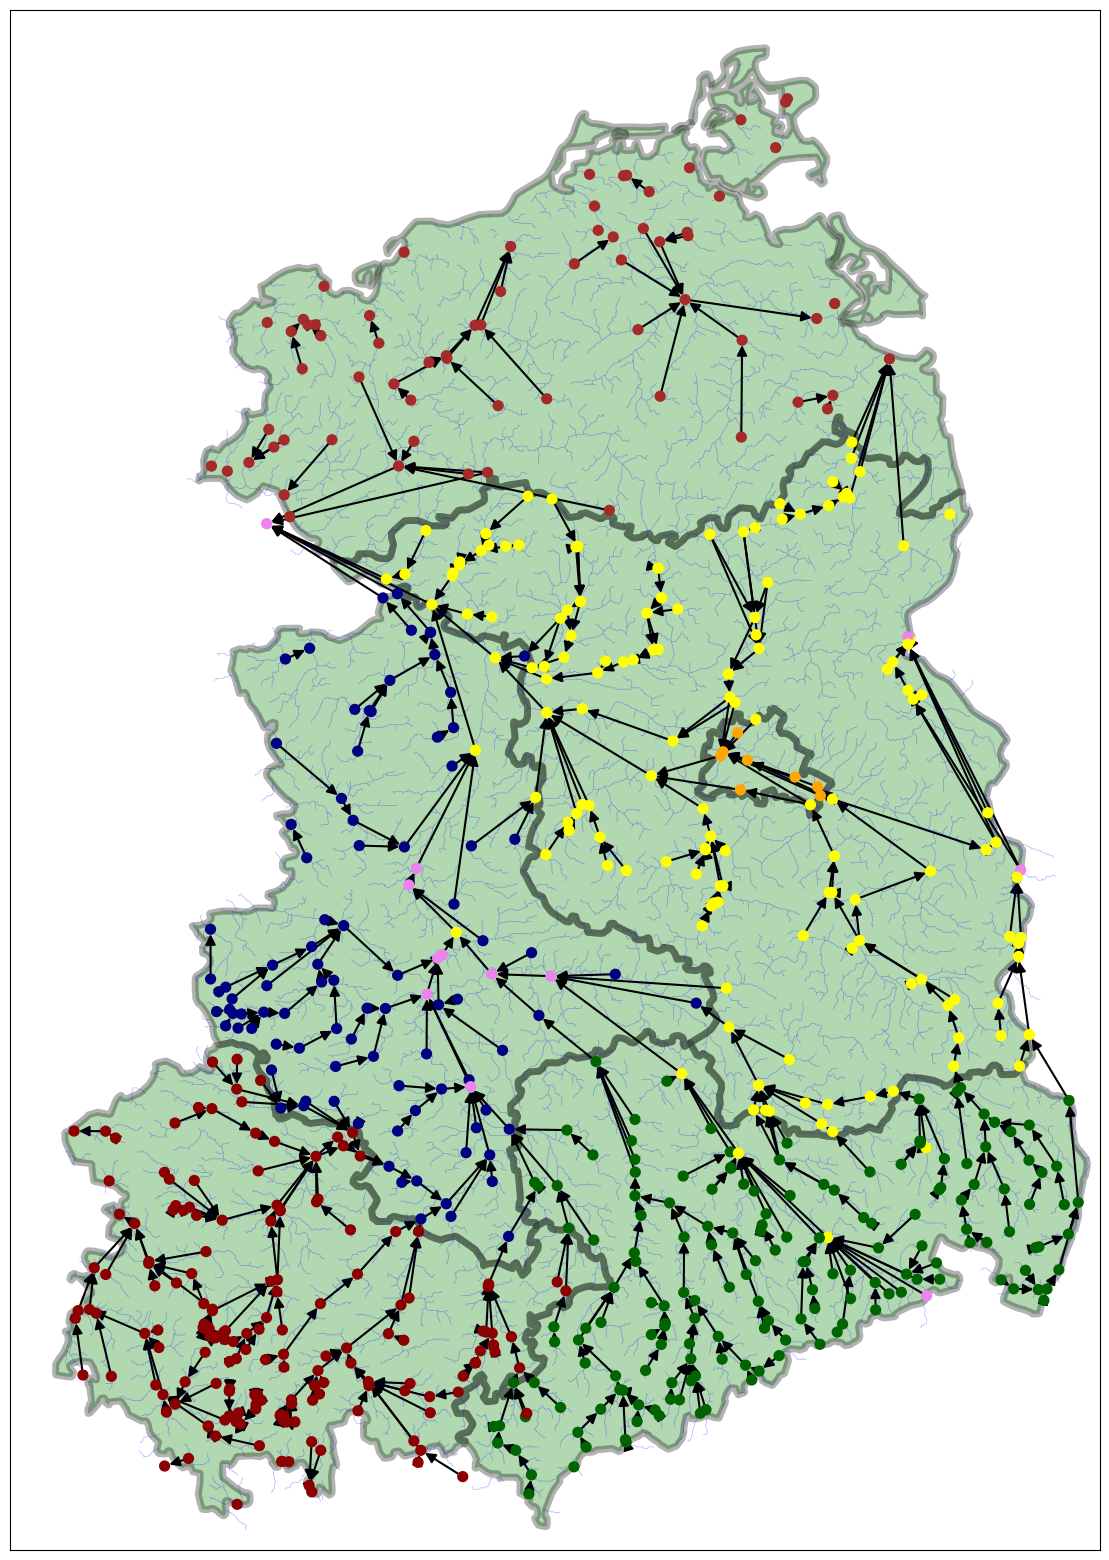

In [31]:
G_eg = pickle.load(open("../product/rivers_east_germany.p", "rb"))
plt.tight_layout()
plot_current_state_of_graph(
    G_eg,
    dpi=300,
    node_size=50,
    lim=(50.1, 54.8),
    limx=(9.65, 15.1),
    save="east.pdf", #"eg_map_alt",
    river_map=True,
    ger_map=True,
    width=1.5,
    label=False,
    arrowsize=15,
    fs=(15, 20),
    font_size=1,
    ger_path = "../product/visualization/east_germany/east_german_map.shp",
    river_path = "../product/visualization/east_germany/river_east_german_map.shp",
    title=""
)

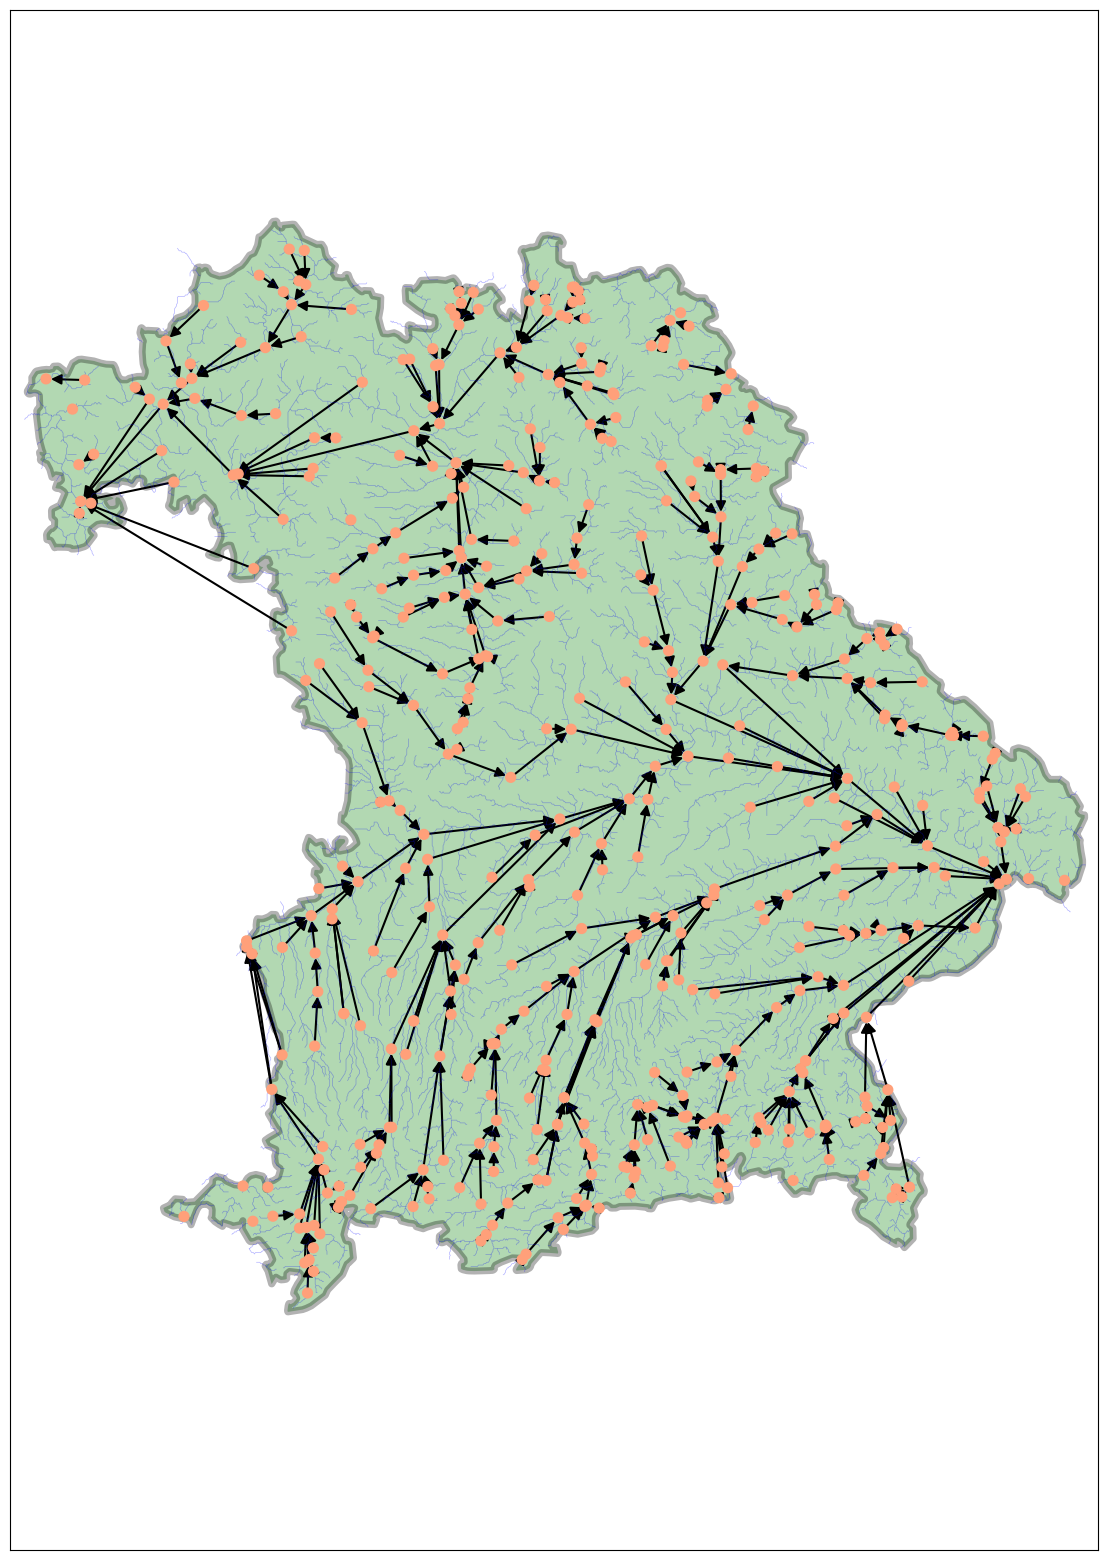

In [24]:
G_b = pickle.load(open("../product/rivers_bavaria.p", "rb"))
plot_current_state_of_graph(
    G_b,
    lim=(46.55, 51.2),
    limx=(8.9, 13.9),
    node_size=50,
    save="bav.pdf", #"eg_map_alt",
    river_map=True,
    ger_map=True,
    width=1.5,
    label=False,
    arrowsize=15,
    fs=(15,20),
    hardcode_colors = ["lightsalmon" for _ in range(len(G_b.nodes))],
    font_size=1,
    ger_path = "../product/visualization/bavaria/bavaria_map.shp",
    river_path = "../product/visualization/bavaria/river_bavaria_map.shp",
    title= ""
    
)

<Figure size 640x480 with 0 Axes>

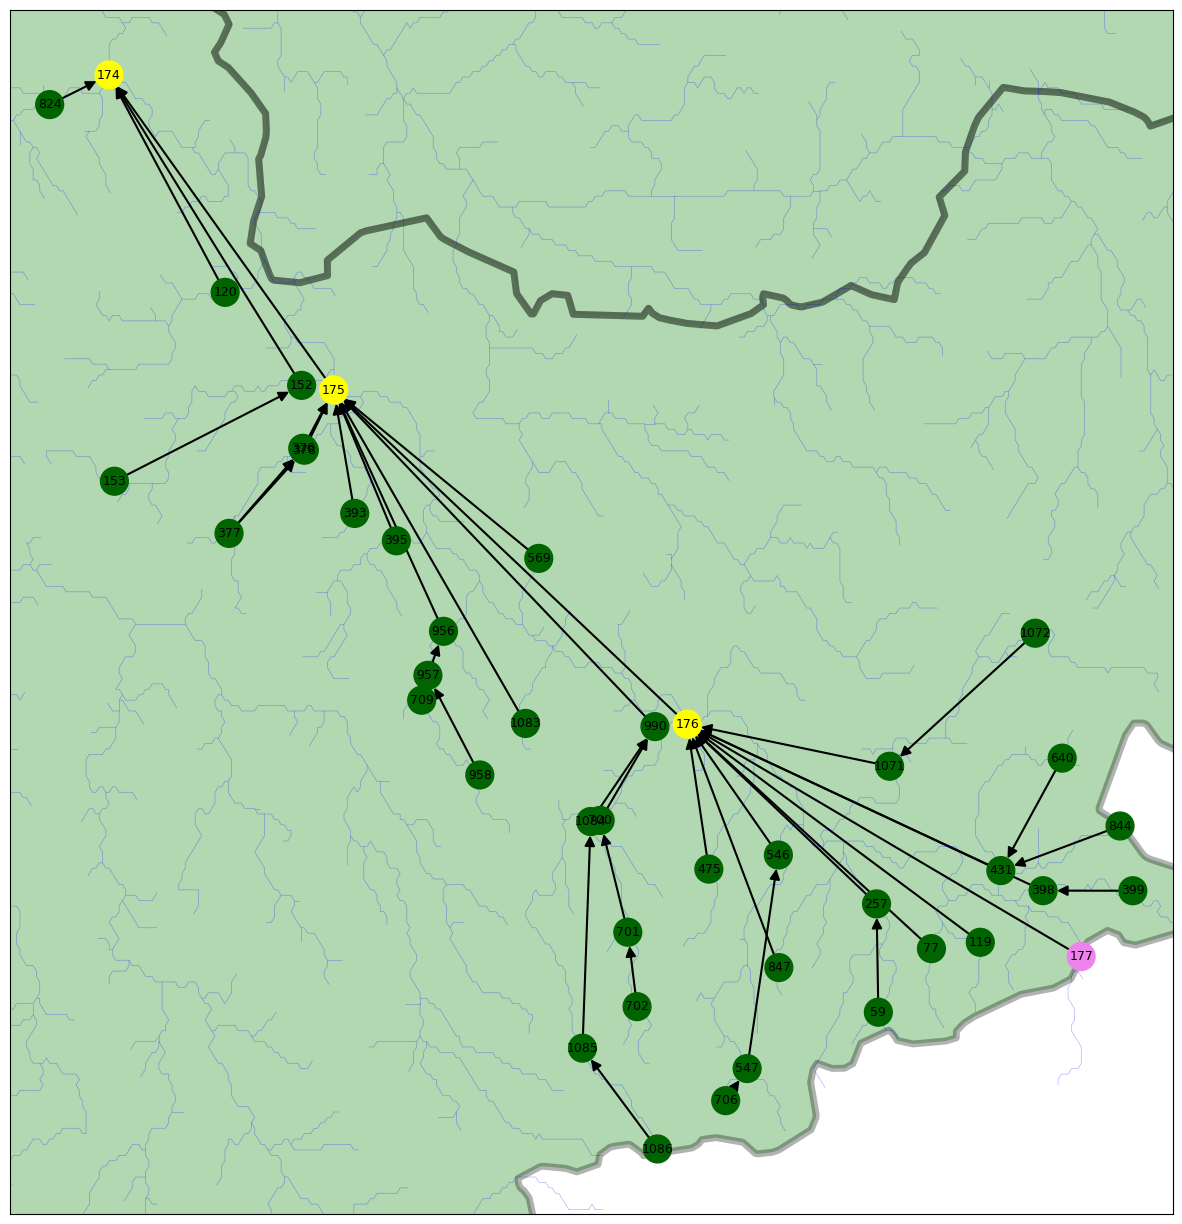

In [30]:
G_eg = pickle.load(open("../product/rivers_flood.p", "rb"))

plt.tight_layout()
plot_current_state_of_graph(
    G_eg,
    dpi=300,
    autozoom=0.05,
    node_size=400,
    lim=(50.1, 54.8),
    limx=(9.65, 15.1),
    save="flood.pdf", #"eg_map_alt",
    river_map=True,
    ger_map=True,
    width=1.5,
    label=True,
    arrowsize=15,
    font_color="black",
    fs=(15, 20),
    font_size=9,
    ger_path = "../product/visualization/east_germany/east_german_map.shp",
    river_path = "../product/visualization/east_germany/river_east_german_map.shp",
    title=""
)

## Data example

In [3]:
# Load the raw ts data and the labels for a specific sample:
ds  =pickle.load(open("../datasets/random_3" + "/east.p", "rb"))

cmap = mpl.colormaps['viridis']
base_c = cmap(np.linspace(0, 1, 4))

example = ds[13]
data = load_sample(p= "../product/rivers_ts_east_germany.csv", which= example)

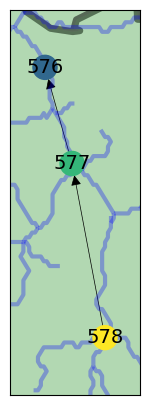

In [14]:
plot_current_state_of_graph(
    example,
    dpi=300,
    autozoom=0.05,
    lim=(50.1, 54.8),
    limx=(9.65, 25.1),
    node_size=300,
    save="sample.pdf", #"eg_map_alt",
    river_map=1,
    ger_map=1,
    width=0.5,
    arrowsize=15.5,
    fs=(5, 5),
    font_size=14,
    ger_path = "../product/visualization/east_germany/east_german_map.shp",
    river_path = "../product/visualization/east_germany/river_east_german_map.shp",
    hardcode_colors = list(base_c)[1:],
    river_width=3,
    title=None

)

In [17]:
# Run some standard preprocessing steps
sample_data = preprocess_data(
    data,
    resolution="24h",
    interpolate=False,
    normalize=False,
)

In [48]:

def fancy_plot(
    sample_data,
    base_c,
    save= 0,
    emph=19999
):
    fig, axs = plt.subplots(3, 1, figsize=(12, 5))
    for n, x in enumerate(sample_data.columns):  #
        axs[n].plot(sample_data[x], linewidth=2, color=base_c[n + 1], alpha=0.8)
        axs[n].set_ylabel("m³/s", fontsize=15)
        position = (
            axs[n].get_xbound()[0] + 150,
            sample_data[x].max() - (sample_data[x].max() - sample_data[x].min()) / 7,
        )
        axs[n].scatter(position[0], position[1], s=900, color=base_c[n + 1])
        offset = 27 if len(x) == 2 else 35
        axs[n].text(
            position[0] - offset,
            position[1],
            x,
            verticalalignment="center",
            fontstyle="italic",
            fontsize=12,
        )
        axs[n].set_xlabel(None)
        axs[n].tick_params(axis="both", which="major", labelsize=12)
        
        
        
        limit =  axs[n].get_xlim()
        
        axs[n].vlines(emph,sample_data[x].min(),sample_data[x].max(), color="red", linewidth=2)
        axs[n].vlines(emph+150,sample_data[x].min(),sample_data[x].max(), color="red", linewidth=2)
        axs[n].hlines(0,emph, emph+150, color="red", linewidth=2)
        axs[n].hlines(sample_data[x].max(),emph, emph+150, color="red", linewidth=2)
        axs[n].set_xlim(limit[0],limit[1])
        
    axs[0].set_xticklabels([])
    axs[1].set_xticklabels([])


    axs[n].set_xlabel("Year", fontsize=14)
    if save: 
        plt.savefig(save,bbox_inches='tight')
    else:
        plt.show()

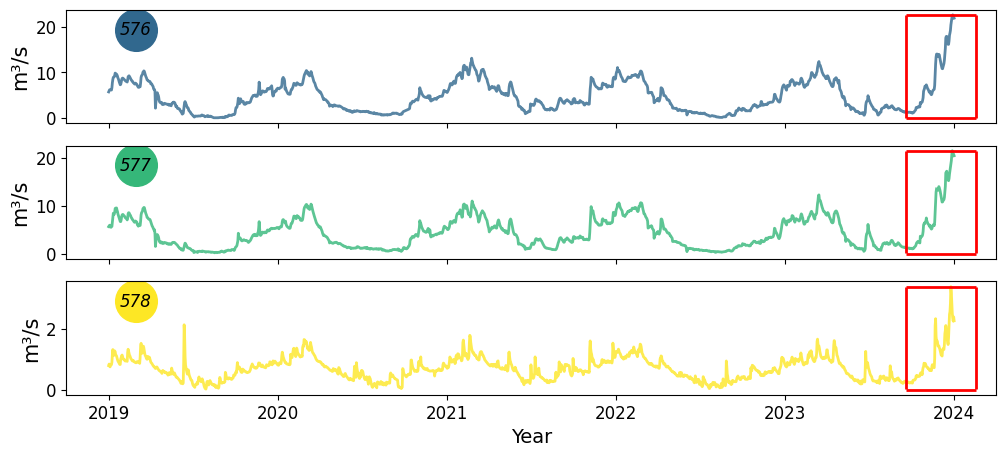

In [49]:
axs = fancy_plot(sample_data, base_c,save="ts.pdf", emph=19620)